In [2]:
!pip install statsmodels
!pip install numpy
!pip install scipy


data bütüklüğü 1323000


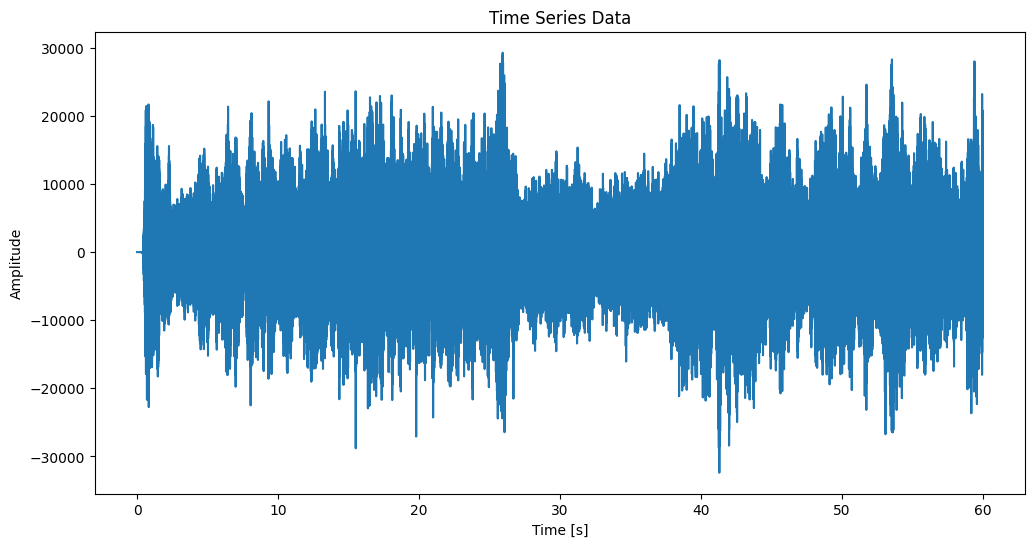

<Figure size 1000x600 with 0 Axes>

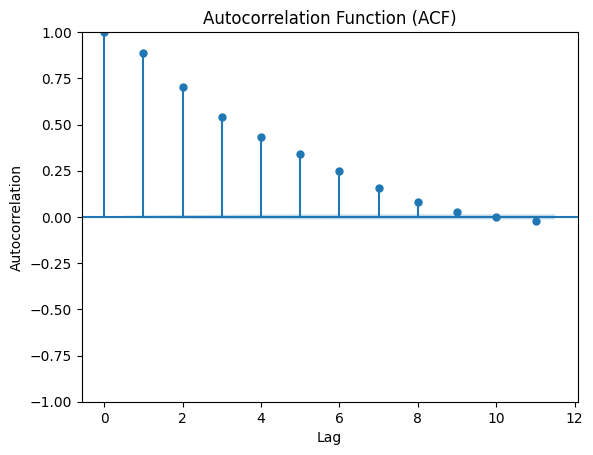

<Figure size 900x900 with 0 Axes>

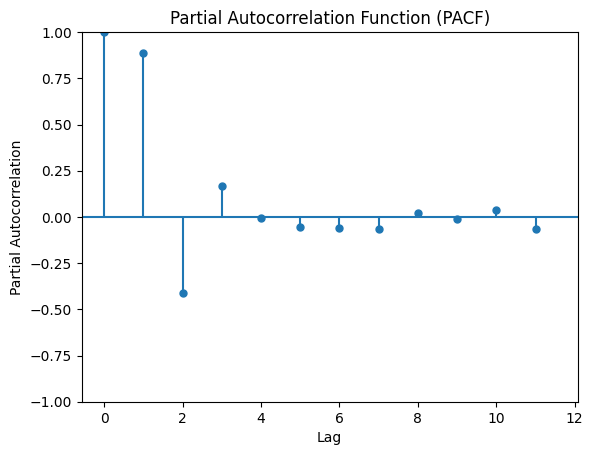

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# WAV dosyasını yükle
sample_rate, data = wavfile.read('/home/deniz/Masaüstü/tez/sesfikri/temizses.wav')

# Eğer stereo ise, mono kanala indir
if len(data.shape) > 1:
    data = data[:, 0]


print(f"data bütüklüğü {len(data)}")

# Sessiz kısımları kontrol et
if np.var(data) == 0:
    raise ValueError("Sinyal sıfır varyansa sahip, otokorelasyon hesaplanamaz.")

# Zaman serisi grafiği
plt.figure(figsize=(12, 6))
time_axis = np.linspace(0, len(data) / sample_rate, num=len(data))
plt.plot(time_axis, data)
plt.title('Time Series Data')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

# ACF grafiği
plt.figure(figsize=(10, 6))
plot_acf(data[:100000], lags=11, alpha=0.05)  # Adjust 'lags' as needed for your analysis
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()


# ACF grafiği
plt.figure(figsize=(9, 9))
plot_pacf(data[:100000], lags=11, alpha=0.05)  # Adjust 'lags' as needed for your analysis
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [3]:
import numpy as np
from scipy.io import wavfile
from scipy.signal import medfilt
# Define the moving average filter
def moving_average_filter(data, window_size=5):
    return np.convolve(data, np.ones(window_size) / window_size, mode='same')

# Load your WAV file
sample_rate, data = wavfile.read('/home/deniz/Masaüstü/tez/sesfikri/bozukses.wav')

# Apply the moving average filter
window_size = 10

filtered_data_new= medfilt(data, kernel_size=5)
filtered_data = moving_average_filter(filtered_data_new, window_size)

# Ensure the filtered data is within the appropriate range for WAV files
# Normalize and cast to original data type
if data.dtype == np.int16:  # For 16-bit PCM
    filtered_data = np.clip(filtered_data, -32768, 32767)
elif data.dtype == np.int32:  # For 32-bit PCM
    filtered_data = np.clip(filtered_data, -2147483648, 2147483647)
elif data.dtype == np.uint8:  # For 8-bit PCM
    filtered_data = np.clip(filtered_data, 0, 255)

filtered_data = filtered_data.astype(data.dtype)

# Save the filtered data to a new WAV file
output_path = '/home/deniz/Masaüstü/tez/sesfikri/onarılmısses.wav'
wavfile.write(output_path, sample_rate, filtered_data)

print(f"Filtered WAV file saved to: {output_path}")


Filtered WAV file saved to: /home/deniz/Masaüstü/tez/sesfikri/onarılmısses.wav


## Mean Absolute Difference

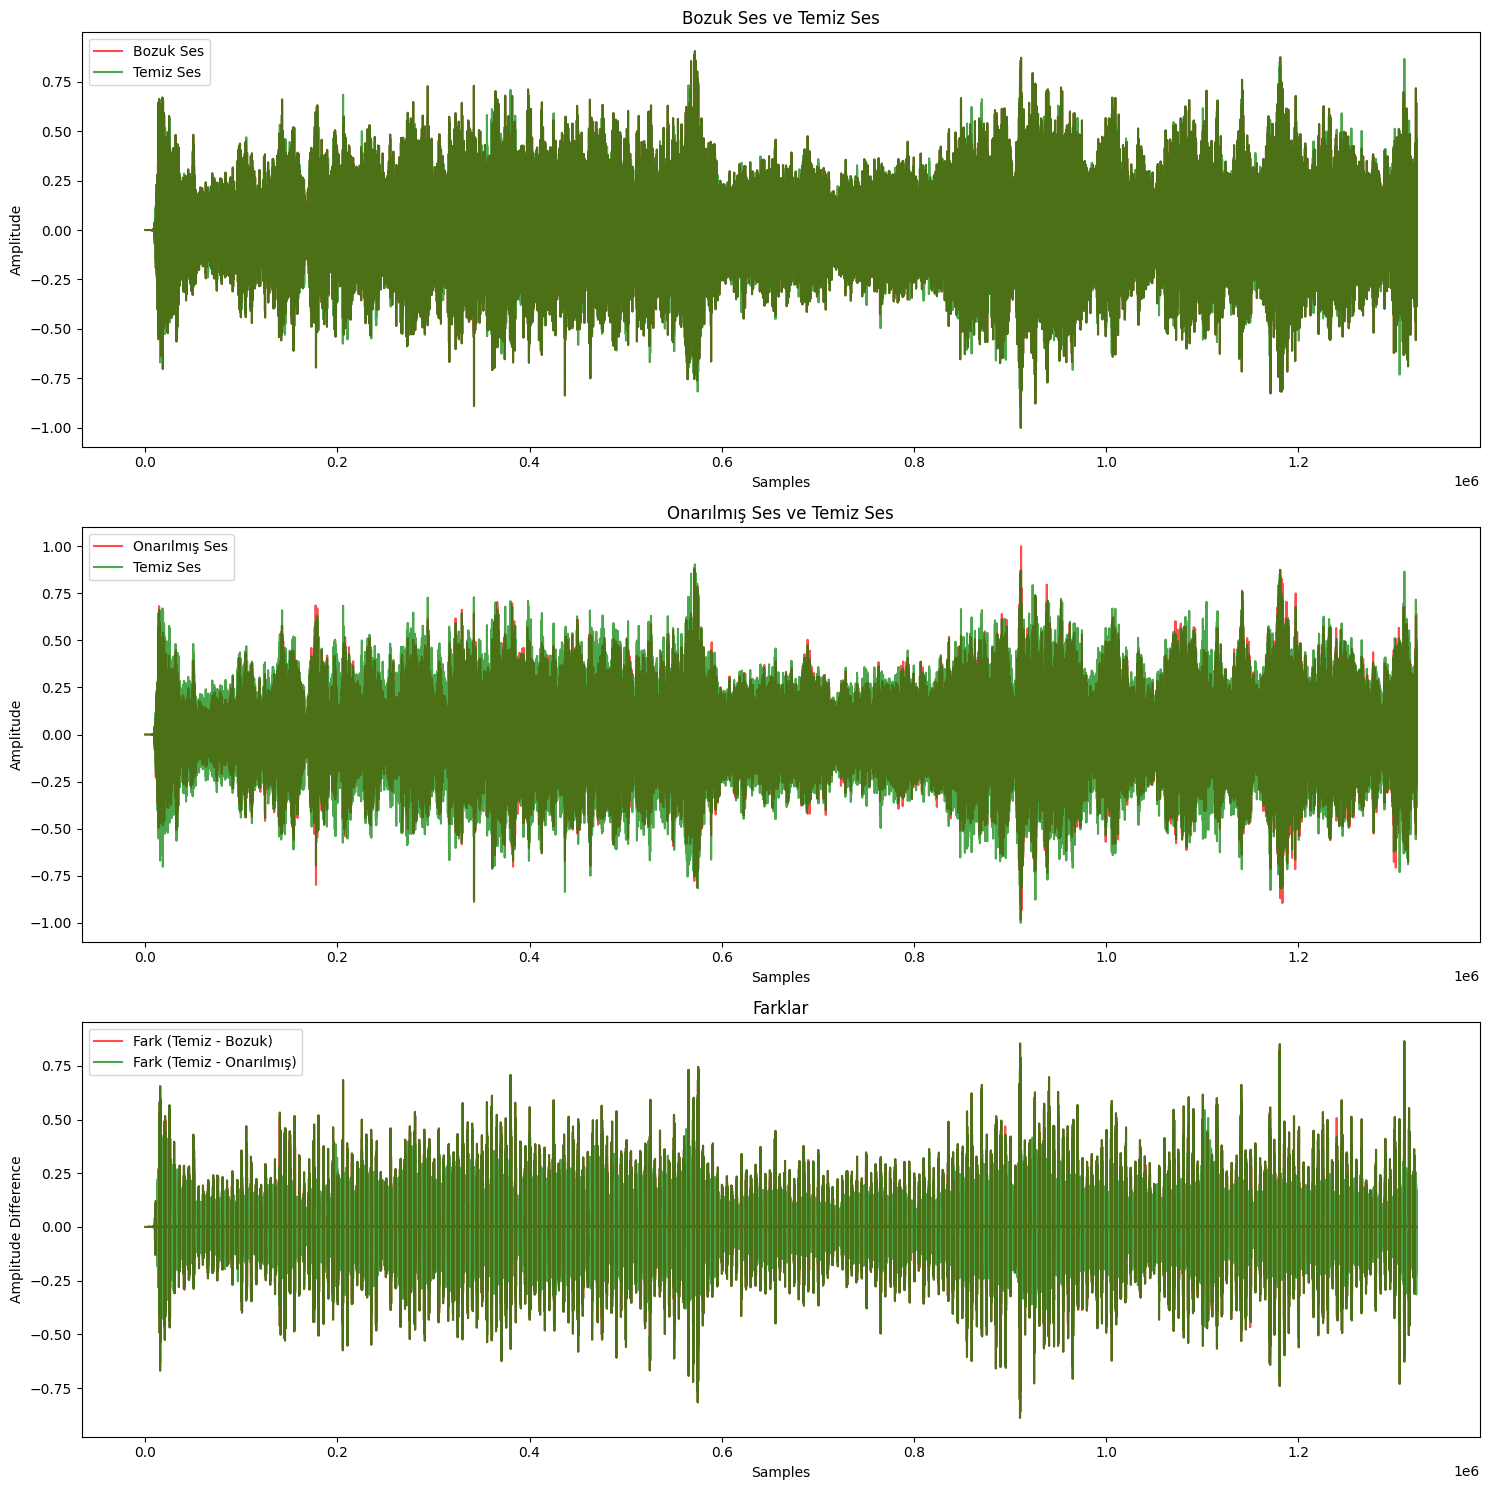

Mean Absolute Difference (Temiz - Bozuk): 0.022252249078960853
Mean Absolute Difference (Temiz - Onarılmış): 0.060578724533584684


In [8]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt

# Reload the audio files
sample_rate_bo, data_bo = wavfile.read('/home/deniz/Masaüstü/tez/sesfikri/bozukses.wav')
sample_rate_re, data_re = wavfile.read('/home/deniz/Masaüstü/tez/sesfikri/onarılmısses.wav')
sample_rate_cl, data_cl = wavfile.read('/home/deniz/Masaüstü/tez/sesfikri/temizses.wav')


# Ensure mono signals
if len(data_bo.shape) > 1:
    data_bo = data_bo[:, 0]
if len(data_re.shape) > 1:
    data_re = data_re[:, 0]
if len(data_cl.shape) > 1:
    data_cl = data_cl[:, 0]

# Normalize the data
data_bo = data_bo / np.max(np.abs(data_bo))
data_re = data_re / np.max(np.abs(data_re))
data_cl = data_cl / np.max(np.abs(data_cl))

# Calculate differences
difference_bo_cl = data_cl - data_bo  # Clean vs Bozuk
difference_re_cl = data_cl - data_re  # Clean vs Onarılmış

# Plot the signals and differences
plt.figure(figsize=(15, 15))

# Bozuk ses and Temiz ses
plt.subplot(3, 1, 1)
plt.plot(data_bo, label="Bozuk Ses", color="red", alpha=0.7)
plt.plot(data_cl, label="Temiz Ses", color="green", alpha=0.7)
plt.title("Bozuk Ses ve Temiz Ses")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend()

# Onarılmış ses and Temiz ses
plt.subplot(3, 1, 2)
plt.plot(data_re, label="Onarılmış Ses", color="red", alpha=0.7)
plt.plot(data_cl, label="Temiz Ses", color="green", alpha=0.7)
plt.title("Onarılmış Ses ve Temiz Ses")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend()

# Differences
plt.subplot(3, 1, 3)
plt.plot(difference_bo_cl, label="Fark (Temiz - Bozuk)", color="red", alpha=0.7)
plt.plot(difference_re_cl, label="Fark (Temiz - Onarılmış)", color="green", alpha=0.7)
plt.title("Farklar")
plt.xlabel("Samples")
plt.ylabel("Amplitude Difference")
plt.legend()

plt.tight_layout()
plt.savefig('/home/deniz/Masaüstü/tez/sesfikri/comparison.png')
plt.show()

# Calculate mean absolute differences
mean_diff_bo_cl = np.mean(np.abs(difference_bo_cl))
mean_diff_re_cl = np.mean(np.abs(difference_re_cl))

print("Mean Absolute Difference (Temiz - Bozuk):", mean_diff_bo_cl)
print("Mean Absolute Difference (Temiz - Onarılmış):", mean_diff_re_cl)


## Signal-to-Noise Ratio (SNR)

In [5]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt



# Load the newly uploaded audio files
sample_rate_bo, data_bo = wavfile.read('/home/deniz/Masaüstü/tez/sesfikri/bozukses.wav')
sample_rate_re, data_re = wavfile.read('/home/deniz/Masaüstü/tez/sesfikri/onarılmısses.wav')
sample_rate_cl, data_cl = wavfile.read('/home/deniz/Masaüstü/tez/sesfikri/temizses.wav')

# Ensure mono signals
if len(data_bo.shape) > 1:
    data_bo = data_bo[:, 0]
if len(data_re.shape) > 1:
    data_re = data_re[:, 0]
if len(data_cl.shape) > 1:
    data_cl = data_cl[:, 0]

# Normalize the data
data_bo = data_bo / np.max(np.abs(data_bo))
data_re = data_re / np.max(np.abs(data_re))
data_cl = data_cl / np.max(np.abs(data_cl))

# Function to calculate Signal-to-Noise Ratio (SNR)
def calculate_snr(signal, noise):
    signal_power = np.mean(signal ** 2)
    noise_power = np.mean(noise ** 2)
    return 10 * np.log10(signal_power / noise_power)

# Calculate differences (as noise)
noise_bo_cl = data_bo - data_cl  # Noise in Bozuk vs Clean
noise_re_cl = data_re - data_cl  # Noise in Onarılmış vs Clean

# Calculate SNR for each comparison
snr_bo_cl = calculate_snr(data_cl, noise_bo_cl)  # SNR for Clean vs Bozuk
snr_re_cl = calculate_snr(data_cl, noise_re_cl)  # SNR for Clean vs Onarılmış

snr_bo_cl, snr_re_cl

print("SNR (Temiz - Bozuk):", snr_bo_cl)
print("SNR (Temiz - Onarılmış):",snr_re_cl)


SNR (Temiz - Bozuk): 6.9459086997680775
SNR (Temiz - Onarılmış): 4.470241742356738
